# Analyse hotels_features

Pour savoir quelles requêtes pourraient avoir le plus d'importance dans l'entraînement de notre modèle, nous parcourons rapidement les caractéristiques du fichier features_hotels.csv contenant, comme son nom l'indique, les features des hôtels de la base de données.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import scipy
import sklearn

In [5]:
hotels_features=pd.read_csv('features_hotels.csv')

In [7]:
hotels_features.head()

,hotel_id,group,brand,city,parking,pool,children_policy
0,0,Yin Yang,Royal Lotus,paris,1,0,1
1,1,Independant,Independant,copenhagen,1,0,0
2,2,Independant,Independant,madrid,0,0,0
3,3,Independant,Independant,rome,1,0,0
4,4,Independant,Independant,sofia,1,0,0


In [17]:
hotels_features.shape

(999, 7)

In [13]:
hotels_features.size

6993

In [22]:
hotels_features.describe()

,hotel_id,parking,pool,children_policy
count,999.000000,999.000000,999.000000,999.000000
mean,499.000000,0.442442,0.169169,0.067067
std,288.530761,0.496925,0.375089,0.304453
min,0.000000,0.000000,0.000000,0.000000
25%,249.500000,0.000000,0.000000,0.000000
50%,499.000000,0.000000,0.000000,0.000000
75%,748.500000,1.000000,0.000000,0.000000
max,998.000000,1.000000,1.000000,2.000000


Au moins 75% des hotels n'ont pas de piscine et pas de children_policy.

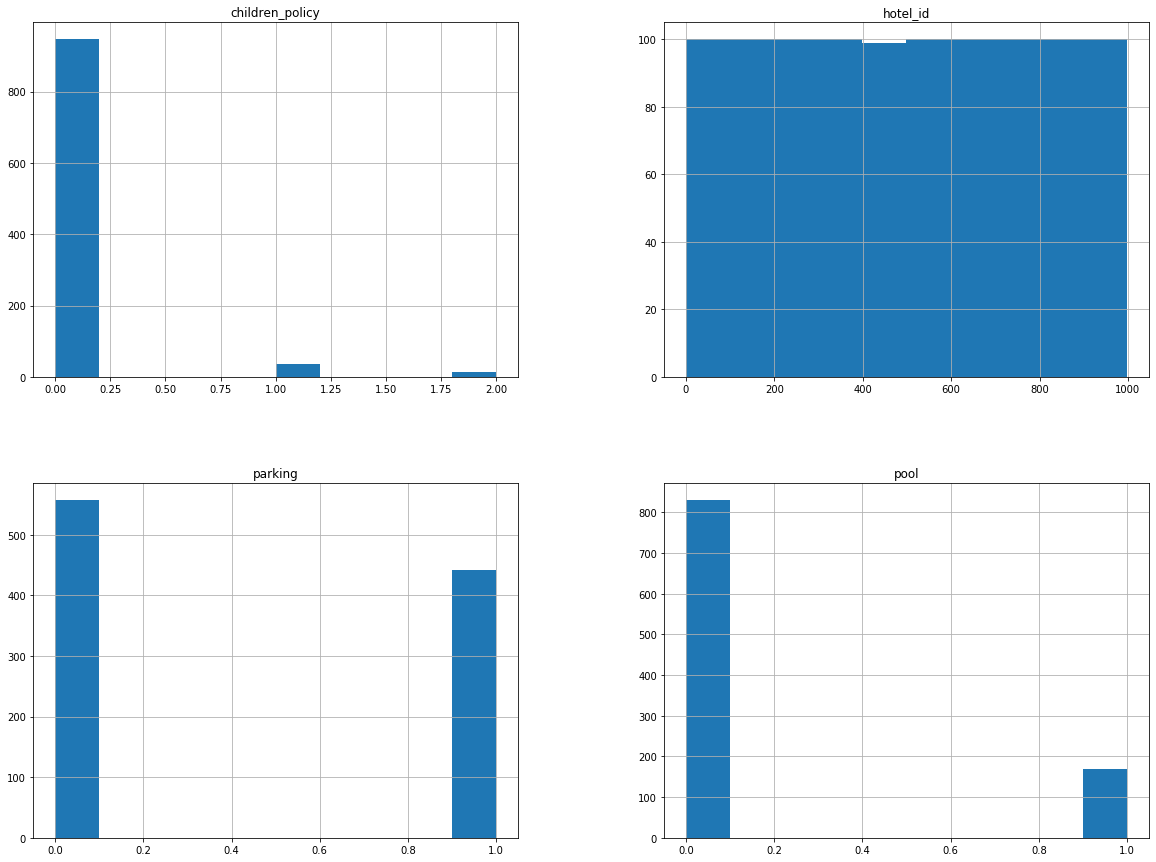

In [24]:
hotels_features.hist(bins=10,figsize=(20,15))
plt.show()

In [36]:
hotels_features.dropna().size

6993

### Analyse par ville :

In [59]:
dict_city=hotels_features.groupby('city')

In [60]:
dict_city.groups.keys()

dict_keys(['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna', 'vilnius'])

In [65]:
dict_city.hotel_id.count()

city
amsterdam     135
copenhagen    144
madrid        118
paris         167
rome          129
sofia          56
valletta       48
vienna        106
vilnius        96
Name: hotel_id, dtype: int64

In [66]:
dict_city.describe()

hotel_id                                                       \
              count        mean         std   min     25%    50%     75%   
city                                                                       
amsterdam     135.0  477.777778  286.648484   9.0  220.50  482.0  719.50   
copenhagen    144.0  537.951389  292.334020   1.0  326.50  535.5  796.00   
madrid        118.0  476.474576  291.585431   2.0  236.50  441.5  736.00   
paris         167.0  513.928144  299.248629   0.0  243.00  560.0  783.50   
rome          129.0  533.294574  269.360655   3.0  324.00  550.0  763.00   
sofia          56.0  476.821429  285.718113   4.0  206.75  507.0  669.50   
valletta       48.0  501.479167  253.567649  55.0  331.75  478.0  718.25   
vienna        106.0  478.660377  301.018078   8.0  221.50  456.5  710.75   
vilnius        96.0  460.208333  289.866936   5.0  197.75  456.0  667.75   

                  parking            ... pool      children_policy            \
              max   count      mean  ...  75%  max           count      mean   
city                                 ...                                       
amsterdam   971.0   135.0  0.466667  ...  0.0  1.0           135.0  0.074074   
copenhagen  995.0   144.0  0.437500  ...  0.0  1.0           144.0  0.104167   
madrid      997.0   118.0  0.423729  ...  0.0  1.0           118.0  0.042373   
paris       998.0   167.0  0.425150  ...  0.0  1.0           167.0  0.077844   
rome        993.0   129.0  0.449612  ...  0.0  1.0           129.0  0.077519   
sofia       984.0    56.0  0.392857  ...  0.0  1.0            56.0  0.000000   
valletta    988.0    48.0  0.500000  ...  0.0  1.0            48.0  0.020833   
vienna      996.0   106.0  0.443396  ...  0.0  1.0           106.0  0.056604   
vilnius     976.0    96.0  0.458333  ...  0.0  1.0            96.0  0.072917   

                                               
                 std  min  25%  50%  75%  max  
city                                           
amsterdam   0.314563  0.0  0.0  0.0  0.0  2.0  
copenhagen  0.421764  0.0  0.0  0.0  0.0  2.0  
madrid      0.202297  0.0  0.0  0.0  0.0  1.0  
paris       0.290285  0.0  0.0  0.0  0.0  2.0  
rome        0.344882  0.0  0.0  0.0  0.0  2.0  
sofia       0.000000  0.0  0.0  0.0  0.0  0.0  
valletta    0.144338  0.0  0.0  0.0  0.0  1.0  
vienna      0.270104  0.0  0.0  0.0  0.0  2.0  
vilnius     0.332290  0.0  0.0  0.0  0.0  2.0  

[9 rows x 32 columns]

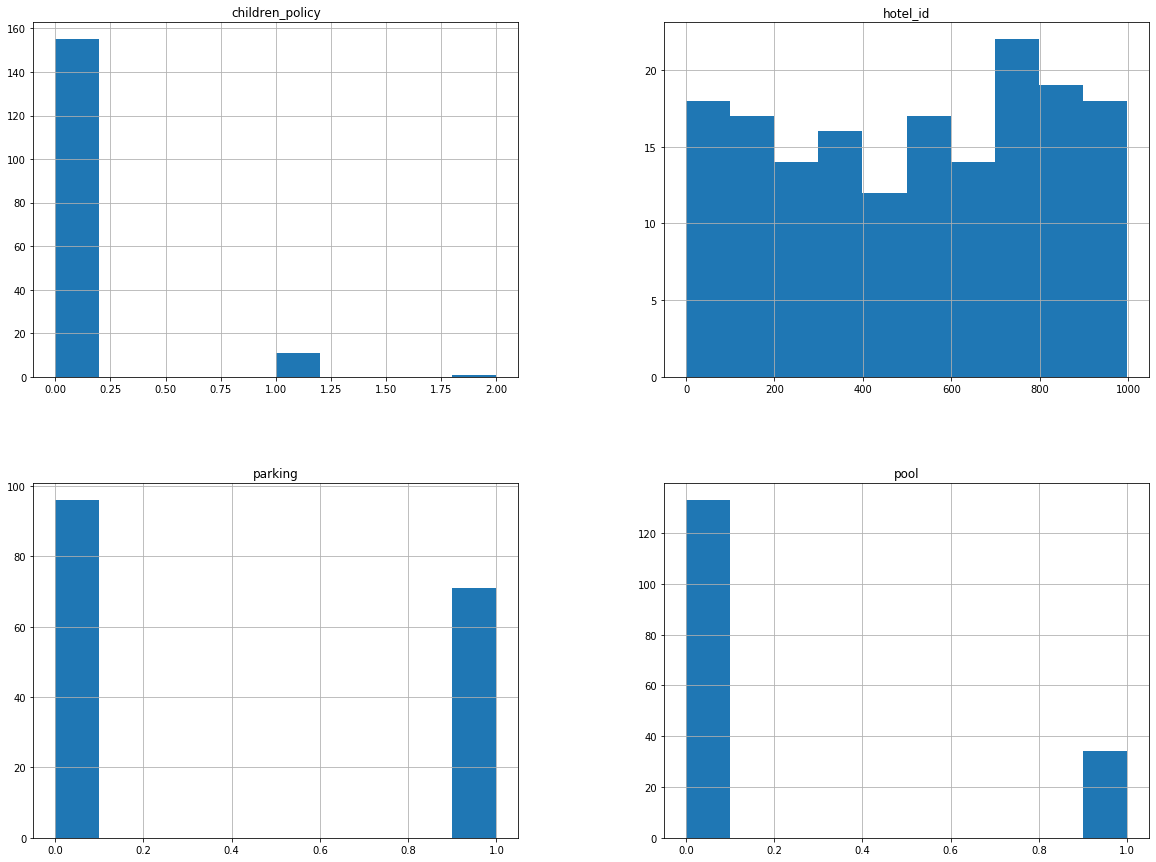

In [83]:
hotels_par=hotels_features.loc[hotels_features.city == 'paris']
hotels_par.hist(bins=10,figsize=(20,15))
plt.show()

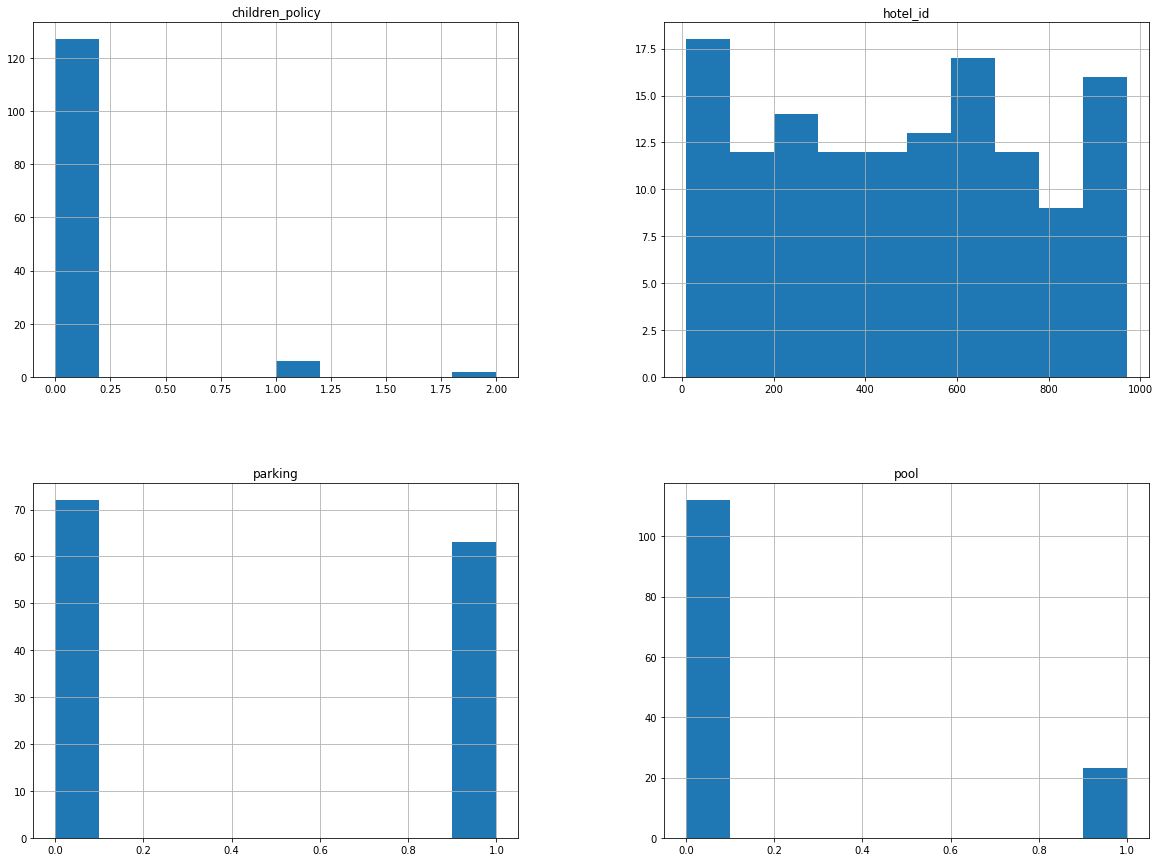

In [81]:
hotels_ams=hotels_features.loc[hotels_features.city == 'amsterdam']
hotels_ams.hist(bins=10,figsize=(20,15))
plt.show()

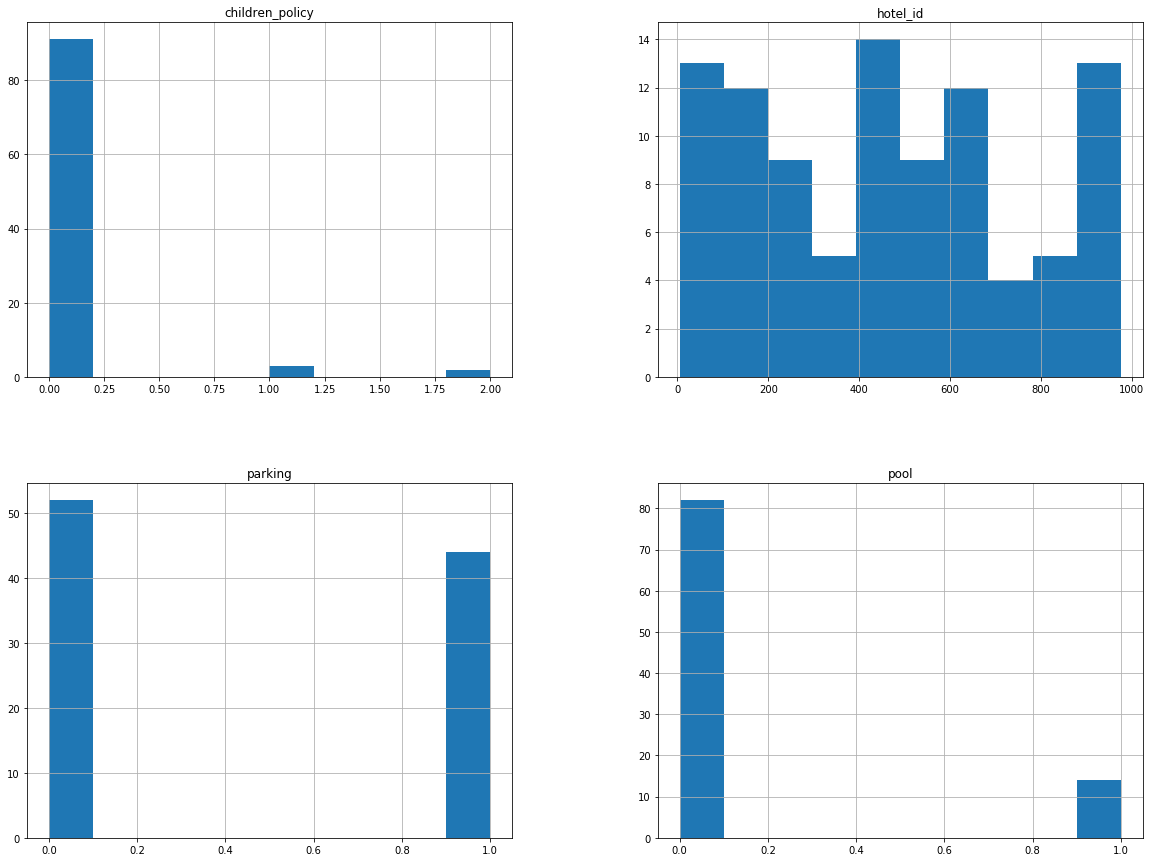

In [82]:
hotels_vil=hotels_features.loc[hotels_features.city == 'vilnius']
hotels_vil.hist(bins=10,figsize=(20,15))
plt.show()

##### Test LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
hotels_city = hotels_features["city"]
hotels_city_encoded = encoder.fit_transform(hotels_city)
#hotels_city_encoded

In [39]:
print(encoder.classes_)

['amsterdam' 'copenhagen' 'madrid' 'paris' 'rome' 'sofia' 'valletta'
 'vienna' 'vilnius']


### Analyse par groupe :

In [84]:
dict_group=hotels_features.groupby('group')

In [85]:
dict_group.groups.keys()

dict_keys(['Accar Hotels', 'Boss Western', 'Chillton Worldwide', 'Independant', 'Morriott International', 'Yin Yang'])

In [86]:
dict_group.hotel_id.count()

group
Accar Hotels              194
Boss Western              163
Chillton Worldwide        103
Independant               245
Morriott International    128
Yin Yang                  166
Name: hotel_id, dtype: int64

### Analyse par brand :

In [87]:
dict_brand=hotels_features.groupby('brand')

In [88]:
dict_brand.groups.keys()

dict_keys(['8 Premium', 'Ardisson', 'Boss Western', 'Chill Garden Inn', 'Corlton', 'CourtYord', 'Ibas', 'Independant', 'J.Halliday Inn', 'Marcure', 'Morriot', 'Navatel', 'Quadrupletree', 'Royal Lotus', 'Safitel', 'Tripletree'])

In [89]:
dict_brand.hotel_id.count()

brand
8 Premium            52
Ardisson             51
Boss Western         87
Chill Garden Inn     34
Corlton              53
CourtYord            33
Ibas                 44
Independant         245
J.Halliday Inn       76
Marcure              50
Morriot              42
Navatel              36
Quadrupletree        36
Royal Lotus          63
Safitel              64
Tripletree           33
Name: hotel_id, dtype: int64